In [1103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1104]:
df = pd.read_csv('./data/train.csv')
df.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C


In [1105]:
df.duplicated().sum()

np.int64(0)

In [1106]:
df['Age'].sample(15)

407     3.00
426    28.00
876    20.00
686    14.00
803     0.42
662    47.00
672    70.00
327    36.00
345    24.00
298      NaN
566    19.00
369    24.00
888      NaN
104    37.00
71     16.00
Name: Age, dtype: float64

<Axes: >

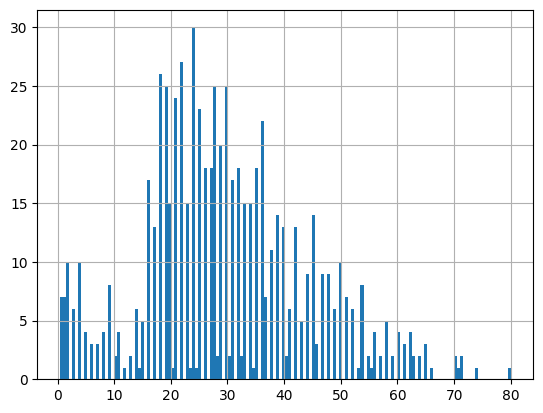

In [1107]:
df_age_notna = df[df['Age'].notna()]
df_age_notna['Age'].hist(bins=150)

In [1108]:
df_age_na = df[df['Age'].isna()]
df_age_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [1109]:
df_age_notna = df_age_notna.drop(columns=['PassengerId', 'Name', 'Ticket'])
df_age_notna

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [1110]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [1111]:
objects = df_age_notna.select_dtypes(include=['object']).columns
objects

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [1112]:
le = LabelEncoder()
df_age_notna[objects] = df_age_notna[objects].apply(le.fit_transform)
df_age_notna

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,134,2
1,1,1,0,38.0,1,0,71.2833,73,0
2,1,3,0,26.0,0,0,7.9250,134,2
3,1,1,0,35.0,1,0,53.1000,49,2
4,0,3,1,35.0,0,0,8.0500,134,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,134,1
886,0,2,1,27.0,0,0,13.0000,134,2
887,1,1,0,19.0,0,0,30.0000,26,2
889,1,1,1,26.0,0,0,30.0000,53,0


In [1113]:
x = df_age_notna.drop(columns=['Age', "Fare", 'Cabin', 'Embarked'])
y = df_age_notna['Age']

In [1114]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [1115]:
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', BaggingRegressor(RandomForestRegressor(n_estimators=100, random_state=42)))
])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 BaggingRegressor(estimator=RandomForestRegressor(random_state=42)))])

In [1116]:
pipe.score(x_val, y_val)

0.2516246866694961

In [1117]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x, y, cv=5).mean()

np.float64(0.2973841299915404)

In [1118]:
df["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

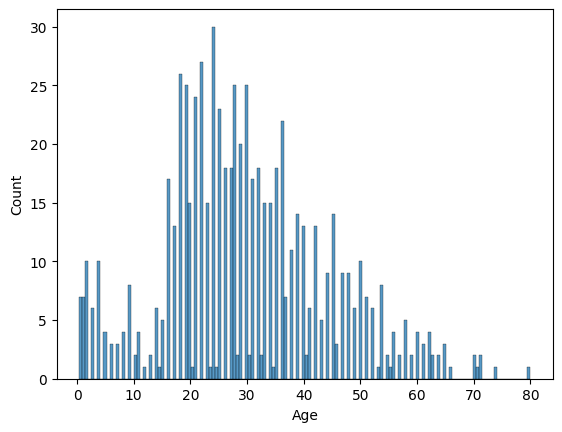

In [ ]:
import seaborn as sns
sns.histplot(df['Age'], bins=150, kde=True, color='blue')

In [1120]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# percentile method to detect outliers
# 15th and 85th percentiles
lower_bound = df.Age.quantile(0.15)
upper_bound = df.Age.quantile(0.85)
lower_bound, upper_bound

(np.float64(17.0), np.float64(45.0))

In [1122]:
df['Age'].isna().sum()

np.int64(177)

In [1123]:
df['Age'] = df["Age"].fillna(pd.Series(np.random.uniform(lower_bound, upper_bound, df['Age'].isna().sum()), index=df[df['Age'].isna()].index))
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    23.026624
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [1124]:
df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,CA 2144,46.9000,NaN,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.000000,0,0,113786,30.5000,C104,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.000000,0,1,392096,12.4750,E121,S
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,44.117180,0,0,330919,7.8292,NaN,Q
800,801,0,2,"Ponesell, Mr. Martin",male,34.000000,0,0,250647,13.0000,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.000000,0,0,248747,13.0000,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.000000,1,5,347082,31.2750,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,35.913073,3,1,4133,25.4667,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.000000,0,0,367231,7.7500,NaN,Q
219,220,0,2,"Harris, Mr. Walter",male,30.000000,0,0,W/C 14208,10.5000,NaN,S


In [1125]:
df.Age.isna().sum()

np.int64(0)

In [1126]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Cabin'].isna().sum()

np.int64(687)

In [ ]:
# no of cabins by using lambda function
df["NumCabins"] = df["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df["NumCabins"].value_counts()

NumCabins
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [1129]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NumCabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.026624,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [1130]:
df = df.drop(columns=['PassengerId', 'Name', 'Cabin'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,female,35.000000,1,0,113803,53.1000,S,1
4,0,3,male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0
887,1,1,female,19.000000,0,0,112053,30.0000,S,1
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0
889,1,1,male,26.000000,0,0,111369,30.0000,C,1


In [1131]:
df["Family Size"] = df["SibSp"] + df["Parch"] + 1
df["Family Size"].value_counts()

Family Size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [1132]:
df["NumCabins"].value_counts()

NumCabins
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [1133]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Family Size'>

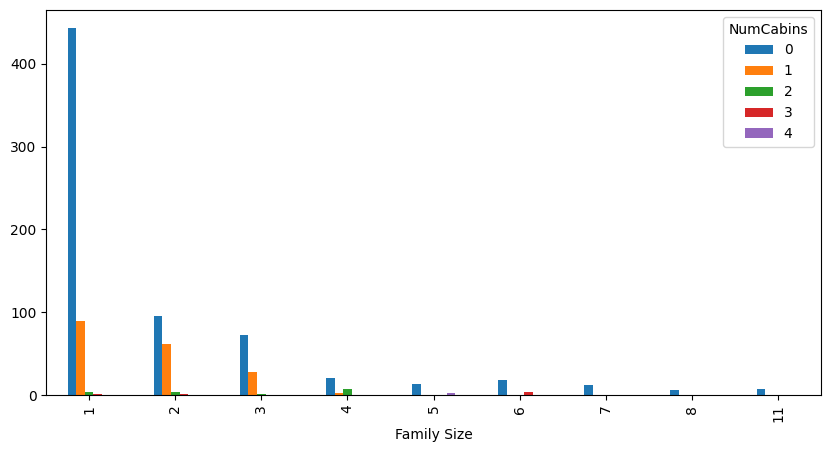

In [1134]:
pd.crosstab(df["Family Size"], df["NumCabins"]).plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='NumCabins'>

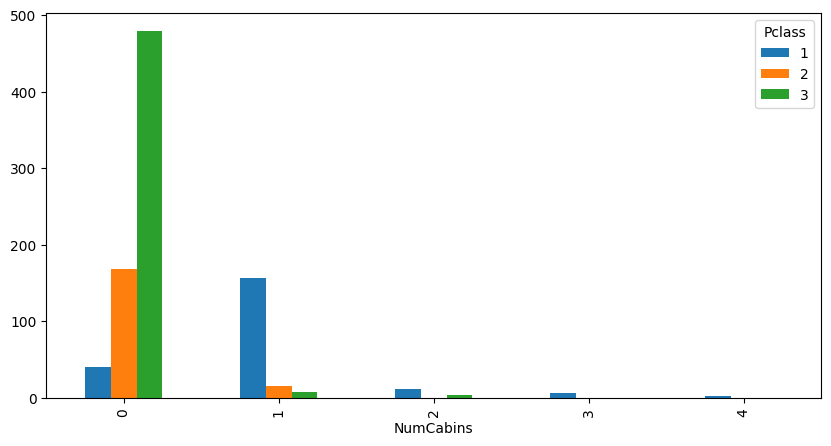

In [1135]:
pd.crosstab(df["NumCabins"], df["Pclass"]).plot(kind='bar', figsize=(10, 5))

In [1136]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [1137]:
df.groupby("Pclass")["Fare"].describe().T

Pclass,1,2,3
count,216.000000,184.000000,491.000000
mean,84.154687,20.662183,13.675550
std,78.380373,13.417399,11.778142
min,0.000000,0.000000,0.000000
25%,30.923950,13.000000,7.750000
50%,60.287500,14.250000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


In [1138]:
df[df["Fare"] > 100]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size
27,0,1,male,19.000000,3,2,19950,263.0000,S,3,6
31,1,1,female,30.577803,1,0,PC 17569,146.5208,C,1,2
88,1,1,female,23.000000,3,2,19950,263.0000,S,3,6
118,0,1,male,24.000000,0,1,PC 17558,247.5208,C,2,2
195,1,1,female,58.000000,0,0,PC 17569,146.5208,C,1,1
215,1,1,female,31.000000,1,0,35273,113.2750,C,1,2
258,1,1,female,35.000000,0,0,PC 17755,512.3292,C,0,1
268,1,1,female,58.000000,0,1,PC 17582,153.4625,S,1,2
269,1,1,female,35.000000,0,0,PC 17760,135.6333,S,1,1
297,0,1,female,2.000000,1,2,113781,151.5500,S,2,4


<Axes: xlabel='Family Size', ylabel='Count'>

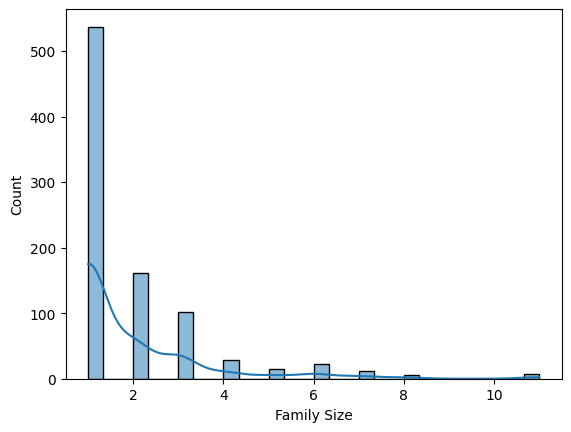

In [1139]:
sns.histplot(df["Family Size"], kde=30, bins=30)

<Axes: xlabel='Fare', ylabel='Count'>

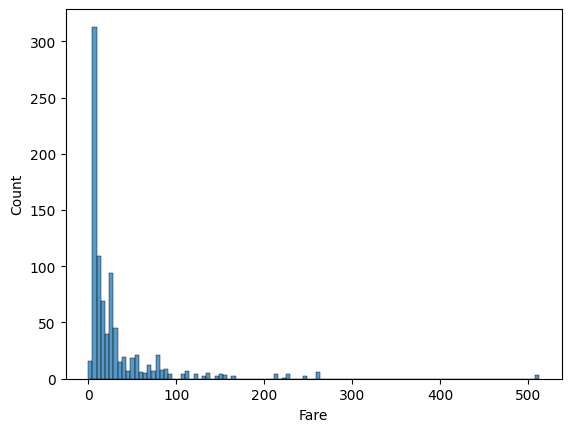

In [1140]:
sns.histplot(df["Fare"])

In [1141]:
df[df['Fare'] > 300 ]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size
258,1,1,female,35.0,0,0,PC 17755,512.3292,C,0,1
679,1,1,male,36.0,0,1,PC 17755,512.3292,C,3,2
737,1,1,male,35.0,0,0,PC 17755,512.3292,C,1,1


In [1142]:
df["Ticket"].duplicated().sum()

np.int64(210)

In [1143]:
df["Ticket"].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [1144]:
df1 = df.copy()
df1 = df1.drop(columns=["Ticket", "SibSp", "Parch"])
df1

,Survived,Pclass,Sex,Age,Fare,Embarked,NumCabins,Family Size
0,0,3,male,22.000000,7.2500,S,0,2
1,1,1,female,38.000000,71.2833,C,1,2
2,1,3,female,26.000000,7.9250,S,0,1
3,1,1,female,35.000000,53.1000,S,1,2
4,0,3,male,35.000000,8.0500,S,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,1
887,1,1,female,19.000000,30.0000,S,1,1
888,0,3,female,23.026624,23.4500,S,0,4
889,1,1,male,26.000000,30.0000,C,1,1


In [1145]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1146]:
df1.Embarked = df1.Embarked.fillna(df1.Embarked.mode()[0])
df1.Embarked.isna().sum()

np.int64(0)

In [1147]:
df1

,Survived,Pclass,Sex,Age,Fare,Embarked,NumCabins,Family Size
0,0,3,male,22.000000,7.2500,S,0,2
1,1,1,female,38.000000,71.2833,C,1,2
2,1,3,female,26.000000,7.9250,S,0,1
3,1,1,female,35.000000,53.1000,S,1,2
4,0,3,male,35.000000,8.0500,S,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,1
887,1,1,female,19.000000,30.0000,S,1,1
888,0,3,female,23.026624,23.4500,S,0,4
889,1,1,male,26.000000,30.0000,C,1,1


In [1148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   NumCabins    891 non-null    int64  
 7   Family Size  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [1149]:
objects = df1.select_dtypes(include=['object']).columns
objects

Index(['Sex', 'Embarked'], dtype='object')

In [1150]:
dummies = pd.get_dummies(df1[objects], drop_first=True)
dummies

,Sex_male,Embarked_Q,Embarked_S
0,True,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,True,False,True
...,...,...,...
886,True,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [1151]:
df1 = pd.concat([df1, dummies], axis=1).drop(columns=objects)
df1

,Survived,Pclass,Age,Fare,NumCabins,Family Size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,0,2,True,False,True
1,1,1,38.000000,71.2833,1,2,False,False,False
2,1,3,26.000000,7.9250,0,1,False,False,True
3,1,1,35.000000,53.1000,1,2,False,False,True
4,0,3,35.000000,8.0500,0,1,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1,True,False,True
887,1,1,19.000000,30.0000,1,1,False,False,True
888,0,3,23.026624,23.4500,0,4,False,False,True
889,1,1,26.000000,30.0000,1,1,True,False,False


In [1152]:
df1

,Survived,Pclass,Age,Fare,NumCabins,Family Size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,7.2500,0,2,True,False,True
1,1,1,38.000000,71.2833,1,2,False,False,False
2,1,3,26.000000,7.9250,0,1,False,False,True
3,1,1,35.000000,53.1000,1,2,False,False,True
4,0,3,35.000000,8.0500,0,1,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1,True,False,True
887,1,1,19.000000,30.0000,1,1,False,False,True
888,0,3,23.026624,23.4500,0,4,False,False,True
889,1,1,26.000000,30.0000,1,1,True,False,False


In [1153]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,2
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,2
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,female,35.000000,1,0,113803,53.1000,S,1,2
4,0,3,male,35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0,1
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,1
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0,4
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,1


In [1154]:
df["Fare per person"] = df["Fare"] / df["Family Size"]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,2,3.62500
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,2,35.64165
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,7.92500
3,1,1,female,35.000000,1,0,113803,53.1000,S,1,2,26.55000
4,0,3,male,35.000000,0,0,373450,8.0500,S,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0,1,13.00000
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,1,30.00000
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0,4,5.86250
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,1,30.00000


In [1155]:
df_class3 = df[df["Pclass"] == 3]
df_class3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,NumCabins,Family Size,Fare per person
count,491.000000,491.0,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.242363,3.0,26.542786,0.615071,0.393075,13.675550,0.032587,2.008147,8.094756
std,0.428949,0.0,11.654572,1.374883,0.888861,11.778142,0.218896,1.953525,6.330092
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,3.0,19.625492,0.000000,0.000000,7.750000,0.000000,1.000000,6.737500
50%,0.000000,3.0,26.000000,0.000000,0.000000,8.050000,0.000000,1.000000,7.750000
75%,0.000000,3.0,34.000000,1.000000,0.000000,15.500000,0.000000,2.000000,8.050000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,2.000000,11.000000,56.495800


<Axes: xlabel='Fare per person', ylabel='Count'>

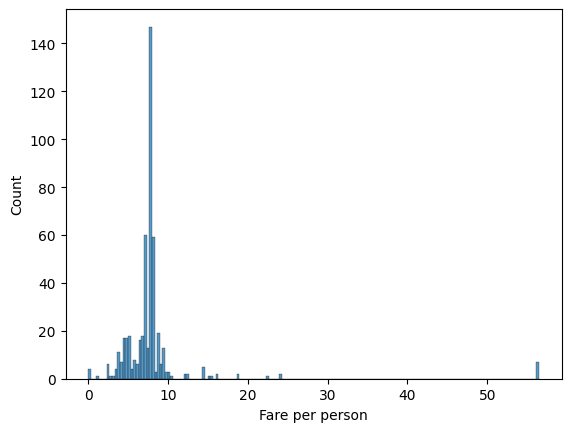

In [1156]:
sns.histplot(df_class3["Fare per person"])

In [1157]:
# percentile to cut the outliers of upper bound
lower_bound = df_class3["Fare per person"].quantile(0.01)
upper_bound = df_class3["Fare per person"].quantile(0.986)
# using only upper bound
upper_bound

np.float64(28.678411999999557)

In [1158]:
# cut the outliers from df
outliers = df_class3[df_class3["Fare per person"] > upper_bound]
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
74,1,3,male,32.000000,0,0,1601,56.4958,S,0,1,56.4958
169,0,3,male,28.000000,0,0,1601,56.4958,S,0,1,56.4958
509,1,3,male,26.000000,0,0,1601,56.4958,S,0,1,56.4958
643,1,3,male,37.213446,0,0,1601,56.4958,S,0,1,56.4958
692,1,3,male,26.697682,0,0,1601,56.4958,S,0,1,56.4958
826,0,3,male,44.717167,0,0,1601,56.4958,S,0,1,56.4958
838,1,3,male,32.000000,0,0,1601,56.4958,S,0,1,56.4958


In [1159]:
df2 = df.copy()
df2 = df2.drop(index=outliers.index)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,2,3.62500
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,2,35.64165
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,7.92500
3,1,1,female,35.000000,1,0,113803,53.1000,S,1,2,26.55000
4,0,3,male,35.000000,0,0,373450,8.0500,S,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0,1,13.00000
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,1,30.00000
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0,4,5.86250
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,1,30.00000


In [1160]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,2,3.62500
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,2,35.64165
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,7.92500
3,1,1,female,35.000000,1,0,113803,53.1000,S,1,2,26.55000
4,0,3,male,35.000000,0,0,373450,8.0500,S,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0,1,13.00000
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,1,30.00000
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0,4,5.86250
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,1,30.00000


In [1161]:
df_class1 = df[df["Pclass"] == 1]
df_class1["Fare per person"].describe()

count    216.000000
mean      52.936943
std       60.926142
min        0.000000
25%       26.550000
50%       33.760400
75%       52.000000
max      512.329200
Name: Fare per person, dtype: float64

<Axes: xlabel='Fare per person', ylabel='Count'>

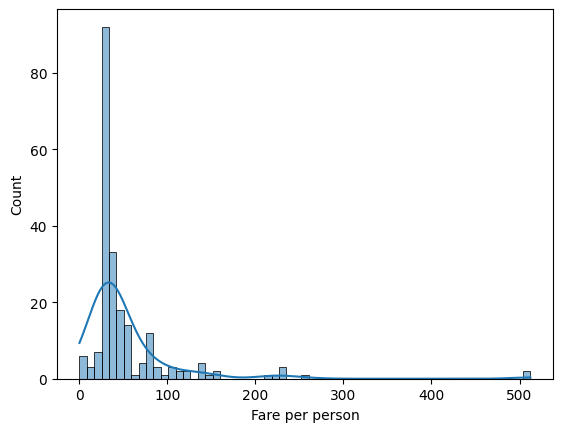

In [1162]:
sns.histplot(df_class1["Fare per person"], kde=True)

In [1163]:
outliers = df_class1[df_class1["Fare per person"] > 200]
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
258,1,1,female,35.000000,0,0,PC 17755,512.3292,C,0,1,512.3292
380,1,1,female,42.000000,0,0,PC 17757,227.5250,C,0,1,227.5250
527,0,1,male,26.181017,0,0,PC 17483,221.7792,S,1,1,221.7792
557,0,1,male,19.773157,0,0,PC 17757,227.5250,C,0,1,227.5250
679,1,1,male,36.000000,0,1,PC 17755,512.3292,C,3,2,256.1646
716,1,1,female,38.000000,0,0,PC 17757,227.5250,C,1,1,227.5250
730,1,1,female,29.000000,0,0,24160,211.3375,S,1,1,211.3375
737,1,1,male,35.000000,0,0,PC 17755,512.3292,C,1,1,512.3292


In [1164]:
df3 = df2.copy()
df3.drop(index=outliers.index, inplace=True)
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,2,3.62500
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,2,35.64165
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,7.92500
3,1,1,female,35.000000,1,0,113803,53.1000,S,1,2,26.55000
4,0,3,male,35.000000,0,0,373450,8.0500,S,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0,1,13.00000
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,1,30.00000
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0,4,5.86250
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,1,30.00000


In [1165]:
df_class2 = df[df["Pclass"] == 2]
df_class2["Fare per person"].describe()

count    184.000000
mean      12.698832
std        8.049364
min        0.000000
25%       10.500000
50%       13.000000
75%       13.000000
max       73.500000
Name: Fare per person, dtype: float64

<Axes: xlabel='Fare per person', ylabel='Count'>

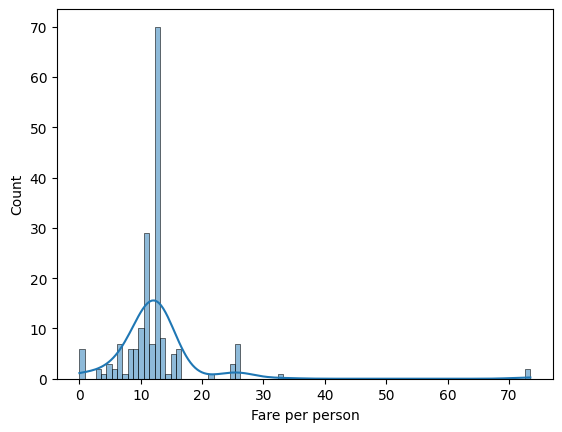

In [1166]:
sns.histplot(df_class2["Fare per person"], kde=True)

In [1167]:
outliers = df_class2["Fare per person"] > 40
outliers = df_class2[outliers]
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
72,0,2,male,21.0,0,0,S.O.C. 14879,73.5,S,0,1,73.5
385,0,2,male,18.0,0,0,S.O.C. 14879,73.5,S,0,1,73.5


In [1168]:
df4 = df3.copy()
df4 = df4.drop(index=outliers.index)
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,2,3.62500
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,2,35.64165
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,7.92500
3,1,1,female,35.000000,1,0,113803,53.1000,S,1,2,26.55000
4,0,3,male,35.000000,0,0,373450,8.0500,S,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0,1,13.00000
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,1,30.00000
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0,4,5.86250
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,1,30.00000


<Axes: xlabel='Fare per person', ylabel='Count'>

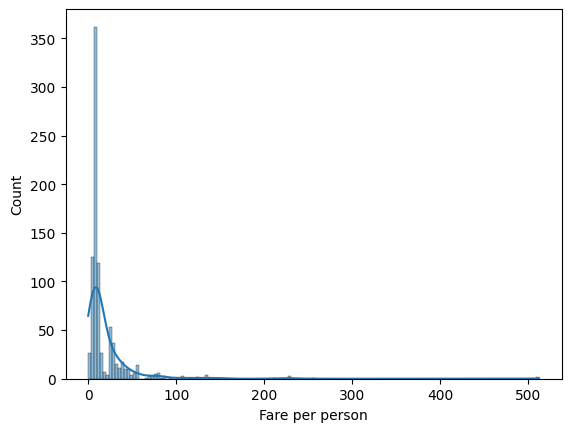

In [1169]:
sns.histplot(df["Fare per person"], kde=True)

In [1170]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'NumCabins', 'Family Size', 'Fare per person'],
      dtype='object')

In [1182]:
df4

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumCabins,Family Size,Fare per person
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,2,3.62500
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,2,35.64165
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,7.92500
3,1,1,female,35.000000,1,0,113803,53.1000,S,1,2,26.55000
4,0,3,male,35.000000,0,0,373450,8.0500,S,0,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S,0,1,13.00000
887,1,1,female,19.000000,0,0,112053,30.0000,S,1,1,30.00000
888,0,3,female,23.026624,1,2,W./C. 6607,23.4500,S,0,4,5.86250
889,1,1,male,26.000000,0,0,111369,30.0000,C,1,1,30.00000


In [1183]:
df5 = df4.copy()
df5 = df5.drop(columns=["Ticket"])
objects = df5.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(df5[objects], drop_first=True)
df5 = pd.concat([df5, dummies], axis=1).drop(columns=objects)
df5

,Survived,Pclass,Age,SibSp,Parch,Fare,NumCabins,Family Size,Fare per person,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,2,3.62500,True,False,True
1,1,1,38.000000,1,0,71.2833,1,2,35.64165,False,False,False
2,1,3,26.000000,0,0,7.9250,0,1,7.92500,False,False,True
3,1,1,35.000000,1,0,53.1000,1,2,26.55000,False,False,True
4,0,3,35.000000,0,0,8.0500,0,1,8.05000,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,13.00000,True,False,True
887,1,1,19.000000,0,0,30.0000,1,1,30.00000,False,False,True
888,0,3,23.026624,1,2,23.4500,0,4,5.86250,False,False,True
889,1,1,26.000000,0,0,30.0000,1,1,30.00000,True,False,False


In [1184]:
# model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC

In [1185]:
df5

,Survived,Pclass,Age,SibSp,Parch,Fare,NumCabins,Family Size,Fare per person,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,2,3.62500,True,False,True
1,1,1,38.000000,1,0,71.2833,1,2,35.64165,False,False,False
2,1,3,26.000000,0,0,7.9250,0,1,7.92500,False,False,True
3,1,1,35.000000,1,0,53.1000,1,2,26.55000,False,False,True
4,0,3,35.000000,0,0,8.0500,0,1,8.05000,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,13.00000,True,False,True
887,1,1,19.000000,0,0,30.0000,1,1,30.00000,False,False,True
888,0,3,23.026624,1,2,23.4500,0,4,5.86250,False,False,True
889,1,1,26.000000,0,0,30.0000,1,1,30.00000,True,False,False


In [1216]:
df8 = df5.copy()
x = df8.drop(columns=["Survived", "Fare per person"])
y = df8["Survived"]

In [1217]:
x

,Pclass,Age,SibSp,Parch,Fare,NumCabins,Family Size,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,2,True,False,True
1,1,38.000000,1,0,71.2833,1,2,False,False,False
2,3,26.000000,0,0,7.9250,0,1,False,False,True
3,1,35.000000,1,0,53.1000,1,2,False,False,True
4,3,35.000000,0,0,8.0500,0,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,True,False,True
887,1,19.000000,0,0,30.0000,1,1,False,False,True
888,3,23.026624,1,2,23.4500,0,4,False,False,True
889,1,26.000000,0,0,30.0000,1,1,True,False,False


In [1218]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 874, dtype: int64

In [1219]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 42)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))
])
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 BaggingClassifier(estimator=RandomForestClassifier(random_state=42)))])

In [1220]:
pipe.score(x_val, y_val)

0.8571428571428571

In [ ]:
print(classification_report(y_val, pipe.predict(x_val)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       102
           1       0.82      0.82      0.82        73

    accuracy                           0.85       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.85      0.85      0.85       175



In [ ]:
print(f1_score(y_val, pipe.predict(x_val), average='macro'))

0.8472334139135106


In [1225]:
# grid search
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', BaggingClassifier(RandomForestClassifier(random_state=42)))
])
param_grid = {
    'model__n_estimators': np.arange(10, 200, 10)
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)
print("Test set score:", grid.score(x_val, y_val))
print("Test set accuracy:", accuracy_score(y_val, grid.predict(x_val)))
print(classification_report(y_val, grid.predict(x_val)))
print("f1 score:", f1_score(y_val, grid.predict(x_val), average='macro'))

Best parameters: {'model__n_estimators': np.int64(50)}
Best cross-validation score: 0.8139876670092498
Test set score: 0.8571428571428571
Test set accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       102
           1       0.83      0.82      0.83        73

    accuracy                           0.86       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.86      0.86      0.86       175

f1 score: 0.8528174936921783


In [1292]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, grid.predict(x_val))
cm

array([[90, 12],
       [13, 60]])

<Axes: title={'center': 'Confusion Matrix Heatmap'}>

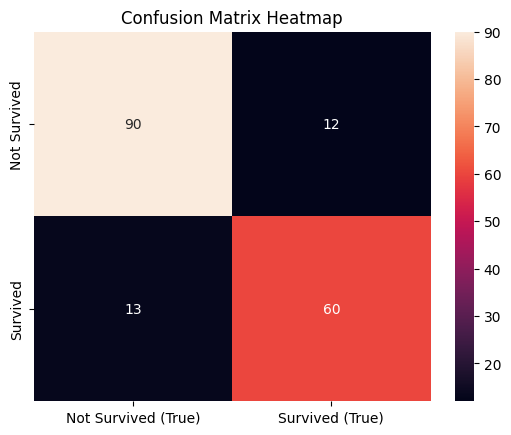

In [1295]:
plt.title('Confusion Matrix Heatmap')
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Survived (True)', 'Survived (True)'], yticklabels=['Not Survived', 'Survived'])

This is our final model. Now taking input.

In [1263]:
df_in = pd.read_csv('./data/test.csv')
df_in

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1264]:
df5.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'NumCabins',
       'Family Size', 'Fare per person', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [1265]:
df_in.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1266]:
passenger_ids = df_in["PassengerId"]

In [1267]:
df_in = df_in.drop(columns=["PassengerId", "Name", "Ticket"])
df_in.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [1268]:
df_in['NumCabins'] = df_in["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df_in = df_in.drop(columns=["Cabin"])
df_in['Family Size'] = df_in["SibSp"] + df_in["Parch"] + 1

In [1269]:
df_in

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NumCabins,Family Size
0,3,male,34.5,0,0,7.8292,Q,0,1
1,3,female,47.0,1,0,7.0000,S,0,2
2,2,male,62.0,0,0,9.6875,Q,0,1
3,3,male,27.0,0,0,8.6625,S,0,1
4,3,female,22.0,1,1,12.2875,S,0,3
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0,1
414,1,female,39.0,0,0,108.9000,C,1,1
415,3,male,38.5,0,0,7.2500,S,0,1
416,3,male,NaN,0,0,8.0500,S,0,1


In [1270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    object 
 9   NumCabins        891 non-null    int64  
 10  Family Size      891 non-null    int64  
 11  Fare per person  891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [1271]:
df_in["NumCabins"] = df_in["NumCabins"].fillna(df_in["NumCabins"].mode()[0])
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked     418 non-null    object 
 7   NumCabins    418 non-null    int64  
 8   Family Size  418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [1272]:
df_in.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

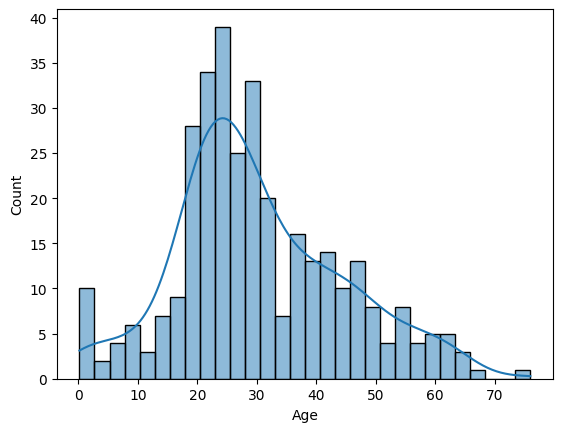

In [1273]:
sns.histplot(df_in["Age"], kde=True, bins=30)

In [1274]:
df_in.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [1275]:
lower_bound = 0.17
upper_bound = 76

In [1276]:
df_in["Age"] = df_in["Age"].fillna(pd.Series(np.random.uniform(lower_bound, upper_bound, df_in['Age'].isna().sum()), index=df_in[df_in['Age'].isna()].index))

In [1277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    object 
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    object 
 9   NumCabins        891 non-null    int64  
 10  Family Size      891 non-null    int64  
 11  Fare per person  891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [1278]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df_in["Fare"] = df_in["Fare"].fillna(df_in["Fare"].median())

In [1279]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    object 
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked     418 non-null    object 
 7   NumCabins    418 non-null    int64  
 8   Family Size  418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [1280]:
objects = df_in.select_dtypes(include=['object']).columns
objects

Index(['Sex', 'Embarked'], dtype='object')

In [1281]:
dummies = pd.get_dummies(df_in[objects], drop_first=True)
dummies

,Sex_male,Embarked_Q,Embarked_S
0,True,True,False
1,False,False,True
2,True,True,False
3,True,False,True
4,False,False,True
...,...,...,...
413,True,False,True
414,False,False,False
415,True,False,True
416,True,False,True


In [1282]:
df_in_final = df_in.copy()
df_in_final = pd.concat([df_in_final, dummies], axis=1).drop(columns=objects)
df_in_final

,Pclass,Age,SibSp,Parch,Fare,NumCabins,Family Size,Sex_male,Embarked_Q,Embarked_S
0,3,34.500000,0,0,7.8292,0,1,True,True,False
1,3,47.000000,1,0,7.0000,0,2,False,False,True
2,2,62.000000,0,0,9.6875,0,1,True,True,False
3,3,27.000000,0,0,8.6625,0,1,True,False,True
4,3,22.000000,1,1,12.2875,0,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,7.925233,0,0,8.0500,0,1,True,False,True
414,1,39.000000,0,0,108.9000,1,1,False,False,False
415,3,38.500000,0,0,7.2500,0,1,True,False,True
416,3,58.535538,0,0,8.0500,0,1,True,False,True


In [1283]:
df_in_final.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'NumCabins', 'Family Size',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [1284]:
x 

,Pclass,Age,SibSp,Parch,Fare,NumCabins,Family Size,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,2,True,False,True
1,1,38.000000,1,0,71.2833,1,2,False,False,False
2,3,26.000000,0,0,7.9250,0,1,False,False,True
3,1,35.000000,1,0,53.1000,1,2,False,False,True
4,3,35.000000,0,0,8.0500,0,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,True,False,True
887,1,19.000000,0,0,30.0000,1,1,False,False,True
888,3,23.026624,1,2,23.4500,0,4,False,False,True
889,1,26.000000,0,0,30.0000,1,1,True,False,False


In [1286]:
x_test = df_in_final
x_test

,Pclass,Age,SibSp,Parch,Fare,NumCabins,Family Size,Sex_male,Embarked_Q,Embarked_S
0,3,34.500000,0,0,7.8292,0,1,True,True,False
1,3,47.000000,1,0,7.0000,0,2,False,False,True
2,2,62.000000,0,0,9.6875,0,1,True,True,False
3,3,27.000000,0,0,8.6625,0,1,True,False,True
4,3,22.000000,1,1,12.2875,0,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,7.925233,0,0,8.0500,0,1,True,False,True
414,1,39.000000,0,0,108.9000,1,1,False,False,False
415,3,38.500000,0,0,7.2500,0,1,True,False,True
416,3,58.535538,0,0,8.0500,0,1,True,False,True


In [1288]:
predictions = grid.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1290]:
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": predictions.astype(int)
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,0


In [1291]:
submission["Survived"].value_counts()

Survived
0    272
1    146
Name: count, dtype: int64

In [1296]:
submission.to_csv('./data/submission.csv', index=False)